# Quiz

In [55]:
import turicreate

In [56]:
image_data = turicreate.SFrame('image_train_data/')
image_test = turicreate.SFrame('image_test_data/')

In [57]:
sketch = turicreate.Sketch(image_data['label'])

In [58]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [59]:
image_data.head(n=2)

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."


In [60]:
cat_model = turicreate.nearest_neighbors.create(image_data[image_data['label'] == 'cat'],
                                                features = ['deep_features'],
                                                label = 'id', verbose=False)

In [61]:
dog_model = turicreate.nearest_neighbors.create(image_data[image_data['label'] == 'dog'],
                                                features = ['deep_features'],
                                                label = 'id', verbose=False)

In [62]:
automobile_model = turicreate.nearest_neighbors.create(image_data[image_data['label'] == 'automobile'],
                                                features = ['deep_features'],
                                                label = 'id', verbose=False)

In [63]:
bird_model = turicreate.nearest_neighbors.create(image_data[image_data['label'] == 'bird'],
                                                features = ['deep_features'],
                                                label = 'id', verbose=False)

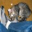

In [64]:
image_test['image'][0]

In [65]:
# What is the nearest cat-labeled image in the training data to the cat image 
# that is the first image in the test data ?

nn_cat = cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 26.562ms     |

| Done         |         | 100         | 87.293ms     |

+--------------+---------+-------------+--------------+

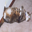

In [66]:
image_data[image_data['id'] == nn_cat[0]['reference_label']]['image'][0]

In [67]:
# What is the nearest dog-labeled image in the training data to the cat image 
# that is the first image in the test data?

nn_dog = dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 40.581ms     |

| Done         |         | 100         | 103.941ms    |

+--------------+---------+-------------+--------------+

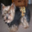

In [68]:
image_data[image_data['id'] == nn_dog[0]['reference_label']]['image'][0]

In [69]:
# For the first image in the test data (image_test[0:1]), compute the mean distance 
# between this image and its five nearest neighbors that are labeled ‘cat’ in the 
# training data (similar to what you did in the previous question).

nn_cat['distance'].mean()

36.15573070978294

In [70]:
# For the first image in the test data (image_test[0:1]), compute the mean distance 
# between this image at its five nearest neighbors that are labeled ‘dog’ in the 
# training data (similar to what you did in the previous question).

nn_dog['distance'].mean()

37.77071136184156

In [71]:
image_test.head(n=2)

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."


In [72]:
image_test_cat = image_test[image_test['label'] == 'cat']

In [73]:
image_test_dog = image_test[image_test['label'] == 'dog']

In [74]:
image_test_bird = image_test[image_test['label'] == 'bird']

In [75]:
image_test_automobile = image_test[image_test['label'] == 'automobile']

In [76]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1, verbose=False)

In [77]:
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1, verbose=False)

In [78]:
dog_bird_neighbors = bird_model.query(image_test_dog, k=1, verbose=False)

In [79]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1, verbose=False)

In [80]:
dog_dog_neighbors

query_label,reference_label,distance,rank
0,49803,33.47735903726335,1
1,5755,32.84584956840554,1
2,20715,35.03970731890584,1
3,13387,33.90103276968193,1
4,12089,37.484925090925636,1
5,6094,34.94516534398124,1
6,3431,39.095727834463545,1
7,6184,37.76961310322034,1
8,2167,35.10891446032838,1
9,7776,43.242283258453455,1


In [81]:
dog_distances = turicreate.SFrame({'dog-automobile': dog_automobile_neighbors['distance'],
                                   'dog-bird': dog_bird_neighbors['distance'],
                                   'dog-cat': dog_cat_neighbors['distance'],
                                   'dog-dog': dog_dog_neighbors['distance']
                                  })

In [82]:
dog_distances.head(n=3)

dog-automobile,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584


In [83]:
def is_dog_correct(row):
    if row is None: 
        return -1
    
    dd_dist = row['dog-dog']
    if row['dog-automobile'] < dd_dist:
        return 0
    if row['dog-bird'] < dd_dist:
        return 0
    if row['dog-cat'] < dd_dist:
        return 0
    
    return 1

In [84]:
result = dog_distances.apply(is_dog_correct)

In [85]:
result.sum() / len(result)

0.678